**METRICES CLASS**

In [ ]:
from matplotlib import pyplot as plt
class Metric:
    def __init__(self,predictions,actual_label):
        self.predictions=predictions
        self.actual_label=actual_label
    def accuracy(self):
        data_len=len(self.predictions)
        correct=0
        for i in range(data_len):
            if self.predictions[i]==self.actual_label[i]:
                correct+=1
        acc=correct/data_len
        print(f"Accuracy of {round(acc*100,3)}%")
    def confusion_matrix(self):
        self.true_negative=0
        self.true_positive=0
        self.false_negative=0
        self.false_positive=0
        for i in range(len(self.predictions)):
            if self.actual_label[i]==0:
                if self.predictions[i]==0:
                    self.true_negative+=1
                else:
                    self.false_positive+=1
            else:
                if self.predictions[i]==0:
                    self.false_negative+=1
                else:
                    self.true_positive+=1
        final_confusion_matrix=np.array([[self.true_negative, self.false_positive],
                                      [self.false_negative, self.true_positive]])
        # print(self.true_positive)
        print("Confusion Matrix: ")
        print(final_confusion_matrix)
        plt.figure(figsize=(2,2))
        plt.imshow(final_confusion_matrix)
    def multi_class_confusion_matrix(self):
        unique_classes=np.unique(self.actual_label)
        confusion_matrix=np.zeros((len(unique_classes),len(unique_classes)),dtype=np.int64)
        for i in range(len(self.predictions)):
            row_index = np.where(unique_classes == self.predictions[i])[0][0]
            col_index = np.where(unique_classes == self.actual_label[i])[0][0]
            confusion_matrix[row_index, col_index] += 1
        plt.imshow(confusion_matrix)
        print(confusion_matrix)
        return confusion_matrix
    def f1_score(self):
        precision = self.true_positive / (self.true_positive + self.false_positive)
        recall = self.true_positive / (self.true_positive + self.false_negative)
        f1 = 2 * ((precision * recall) / (precision + recall))
        print(f"F1 Score: {f1:.2f}")
    def multi_class_f1_Score(self,confusion_matrix):
        num_classes = confusion_matrix.shape[0]
        precision = np.zeros(num_classes)
        recall = np.zeros(num_classes)
        f1_score = np.zeros(num_classes)

        for i in range(num_classes):
            true_positive = confusion_matrix[i, i]
            false_positive = np.sum(confusion_matrix[:, i]) - true_positive
            false_negative = np.sum(confusion_matrix[i, :]) - true_positive

            precision[i] = true_positive / (true_positive + false_positive)
            recall[i] = true_positive / (true_positive + false_negative)

            f1_score[i] = 2 * (precision[i] * recall[i]) / (precision[i] + recall[i])

        return f1_score

    def roc_curve(self, predicted_scores):
        tpr_values = []
        fpr_values = []

        thresholds = sorted(set(predicted_scores), reverse=True)

        total_positives = sum(self.actual_label)
        total_negatives = len(self.actual_label) - total_positives

        tp = 0
        fp = 0

        for threshold in thresholds:
            predictions = [1 if score >= threshold else 0 for score in predicted_scores]

            tp = sum(1 for p, actual in zip(predictions, self.actual_label) if p == 1 and actual == 1)
            fp = sum(1 for p, actual in zip(predictions, self.actual_label) if p == 1 and actual == 0)
            tpr = tp / total_positives
            fpr = fp / total_negatives

            tpr_values.append(tpr)
            fpr_values.append(fpr)

        plt.plot(fpr_values, tpr_values, marker='o', linestyle='-')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.grid(True)
        plt.show

    def multi_class_roc(self,probabilities):
        tpr_values = []
        fpr_values = []

        thresholds = sorted(set(probabilities), reverse=True)

        total_positives = sum(self.actual_labels)
        total_negatives = len(self.actual_labels) - total_positives

        for threshold in thresholds:
            predictions = [1 if score >= threshold else 0 for score in probabilities]

            tp = sum(1 for p, actual in zip(predictions, self.actual_labels) if p == 1 and actual == 1)
            fp = sum(1 for p, actual in zip(predictions, self.actual_labels) if p == 1 and actual == 0)
            tpr = tp / total_positives
            fpr = fp / total_negatives

            tpr_values.append(tpr)
            fpr_values.append(fpr)

        plt.plot(fpr_values, tpr_values, marker='o', linestyle='-')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.grid(True)
        plt.show()

**QUESTION_NO: 4**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

file_path = '/content/drive/MyDrive/Second Sem_IISc/PRNN/Assignment1/multi_class_classification_data_group_12_train.txt'
data = np.loadtxt(file_path,delimiter='\t',dtype=str)

In [ ]:
# Extracting features and labels
header =data[0]
data = data[1:]
X = np.array(data[:, :-1], dtype=float)
y = (data[:, -1] == '1').astype(int)
print(y[:10])
print (X[:10])
len(y)

[0 0 1 0 1 0 1 1 0 1]
[[-0.07507717  0.10273765  0.87173648  0.64996826  0.26391414  0.94111353
   0.95476481 -1.00797516  0.24818829  0.78423798]
 [ 1.56636695  0.26402381 -0.4183808  -0.50478917  0.63794758  1.05240289
   1.12148252  0.77743505 -0.44951059 -0.91730746]
 [ 0.25965638  0.34721591 -0.11265665  1.75903262  0.76046038  2.2329716
   0.39908136  0.72503226  0.83467671  0.2539137 ]
 [ 0.97232721  1.00168369  0.9575247   0.57887199 -2.09749647  0.26375302
   0.30430834  0.82935406  1.27305404 -0.95196365]
 [ 0.44164443 -1.74594576  0.93457662  0.02136216  1.42058422 -0.20382106
   0.86917741 -0.24349561 -0.25559359  0.90881951]
 [ 0.6144514   0.93084427  0.55245515 -0.97324234  0.73730957  0.45770411
   0.9188454   1.26692296  0.40744467  1.00579537]
 [ 0.96330184  0.17082925  1.59410663 -0.53130938  0.60256371 -0.72765557
   0.01332925  2.20451189 -0.4257252   0.67695601]
 [ 0.60151916  1.38205113 -0.32884427  0.07980752  0.81336005  1.00551017
   0.8451814  -2.06139494 -1.3

14000

In [ ]:
# Split the data into training and testing sets
split_idx = int(0.8* len(y))
X_train, X_test = X[:split_idx, :], X[split_idx:, :]
y_train, y_test = y[:split_idx], y[split_idx:]

**Using Normal**

In [ ]:
class BinaryClassification_Normal_ClassConditionalDensities:
    def fit(self, X, y):
        '''totalDataPointsIn_X=N1+N0=N
          totalDataPointsIn_class1=N1
          totalDataPointsIn_class0=N0
        '''
        N=np.size(y)
        N1=np.count_nonzero(y == 1)
        N0=N-N1
        self.priorOnClass1=(N1/N)
        self.priorOnClass0=1-self.priorOnClass1
        # Creating separate arrays for class 1 (X1) and class 0 (X0)
        X1 = X[y == 1]
        X0 = X[y == 0]
        # Calculating mean vectors mu1 and mu0
        self.mu1 = np.mean(X1, axis=0)
        self.mu0 = np.mean(X0, axis=0)
        # Calculate the scatter matrix S1 for class 1
        S1 = np.zeros((X1.shape[1], X1.shape[1]))  # Initialize the scatter matrix S1
        S0 = np.zeros((X0.shape[1], X0.shape[1]))  # Initialize the scatter matrix S0
        for xi in X1:
            xi_minus_mu1 = xi - self.mu1
            S1 += np.outer(xi_minus_mu1, xi_minus_mu1)

        for xi in X0:
            xi_minus_mu0 = xi - self.mu0
            S0 += np.outer(xi_minus_mu0, xi_minus_mu0)

        S1=S1.T
        S0=S0.T
        S1 /= N1
        S0 /=N0
        S=((N1/N)*S1)+((N0/N)*S0)

        self.Sigma=S


    def predict(self, X):
        # Calculating the posterior probabilities for class 1 and class 0
        posterior_class1 = self.priorOnClass1 * self.multinomial_normal_density(X, self.mu1, self.Sigma)
        posterior_class0 = self.priorOnClass0 * self.multinomial_normal_density(X, self.mu0, self.Sigma)

        # Assigning the class with the maximum posterior probability
        predicted_class = np.where(posterior_class1 >= posterior_class0, 1, 0)
        #posterior_probabilities = np.array([posterior_class1])

        return posterior_class1, predicted_class

    def multinomial_normal_density(self, X, mean, cov):
        """Calculate the Multinomial Normal Density for a given dataset."""
        # Assuming X is a matrix where each row is a data point
        det_cov = np.linalg.det(cov)
        inv_cov = np.linalg.inv(cov)
        constant_term = 1 / ((2 * np.pi) ** (X.shape[1] / 2) * np.sqrt(det_cov))

        exponent_term = np.exp(-0.5 * np.sum(np.dot((X - mean), inv_cov) * (X - mean), axis=1))

        return constant_term * exponent_term






In [ ]:
classifier =BinaryClassification_Normal_ClassConditionalDensities()
classifier.fit(X_train, y_train)
posterior_class1,y_pred = classifier.predict(X_test)
posterior_class1.size
y_test.size
print(posterior_class1)

[3.45367934e-04 7.25854662e-05 7.11787363e-06 ... 7.12113153e-06
 1.60870211e-06 1.03430978e-06]


Accuracy of 66.286%
Confusion Matrix: 
[[951 447]
 [497 905]]
F1 Score: 0.66


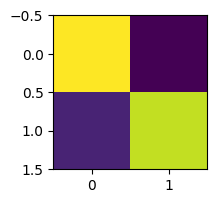

In [ ]:
'''# 1. Classification Accuracy
correct_predictions = np.sum(y_test == y_pred)'''
'''total_samples = len(y_test)
accuracy = (correct_predictions / total_samples)*100
print("Classification Accuracy: {:.2f}%".format(accuracy))
'''
normal_metric=Metric(y_pred,y_test)
normal_metric.accuracy()
normal_metric.confusion_matrix()
normal_metric.f1_score()


**Using GMM**

In [ ]:
class GaussianMixtureModel:
    def __init__(self, num_features, num_components=4, max_iters=1000, tolerance=1e-4):
        self.num_features = num_features
        self.num_components = num_components
        self.max_iters = max_iters
        self.tolerance = tolerance

        # Initialize model parameters
        self.pi = np.ones(num_components) / num_components
        self.mu = np.random.rand(num_components, num_features)
        self.covariance = np.array([np.eye(num_features) for _ in range(num_components)])

    def gaussian_pdf(self, x, mean, cov):
        """
        Calculate the multivariate Gaussian probability density function.
        """
        exponent = -0.5 * np.sum(np.dot(x - mean, np.linalg.inv(cov)) * (x - mean), axis=1)
        return (1.0 / (np.sqrt((2 * np.pi) ** self.num_features * np.linalg.det(cov))) *
                np.exp(exponent))

    def expectation_step(self, X):
        """
        E-step: Calculate the responsibilities (probability that each data point belongs to each cluster).
        """
        responsibilities = np.zeros((len(X), self.num_components))

        for k in range(self.num_components):
            responsibilities[:, k] = self.pi[k] * self.gaussian_pdf(X, self.mu[k], self.covariance[k])

        # Normalize responsibilities
        responsibilities /= responsibilities.sum(axis=1, keepdims=True)

        return responsibilities

    def maximization_step(self, X, responsibilities):
        """
        M-step: Update model parameters based on the responsibilities.
        """
        Nk = responsibilities.sum(axis=0)

        # Update cluster probabilities
        self.pi = Nk / len(X)

        # Update means
        self.mu = np.dot(responsibilities.T, X) / Nk[:, np.newaxis]

        # Update covariances
        for k in range(self.num_components):
            diff = X - self.mu[k]
            self.covariance[k] = np.dot(responsibilities[:, k] * diff.T, diff) / Nk[k]

    def fit(self, X):
        """
        Fit the GMM to the data.
        """
        for iteration in range(self.max_iters):
            # E-step
            responsibilities = self.expectation_step(X)

            # M-step
            self.maximization_step(X, responsibilities)

            # Check for convergence
            if iteration > 0:
                diff = np.linalg.norm(self.mu - prev_mu)
                if diff < self.tolerance:
                    break

            prev_mu = np.copy(self.mu)

    def predict(self, X):
        """
        Predict the most likely class for each data point.
        """
        responsibilities = self.expectation_step(X)
        return np.argmax(responsibilities, axis=1)




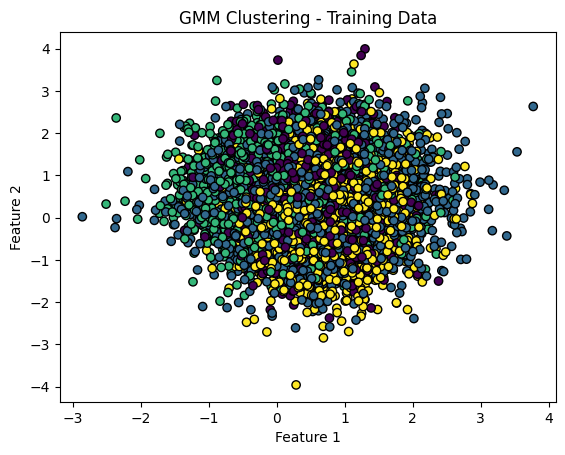

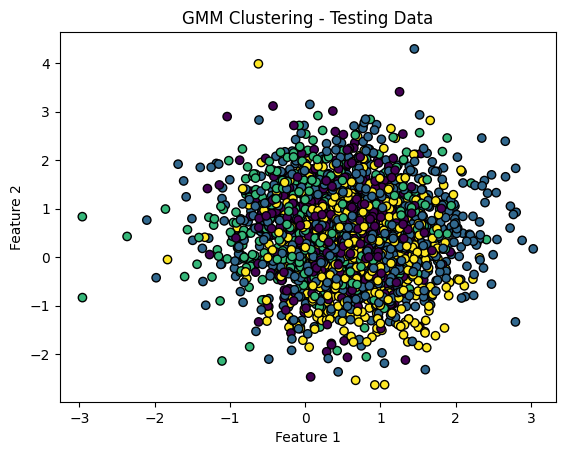

In [ ]:
# Initialize and fit GMM
num_features = X_train.shape[1]
num_components = 4  # Change this to the desired number of components
gmm = GaussianMixtureModel(num_features, num_components)
gmm.fit(X_train)

# Predictions
predictions_train = gmm.predict(X_train)
predictions_test = gmm.predict(X_test)

# Visualize the results for the first two features
plt.scatter(X_train[:, 0], X_train[:, 1], c=predictions_train, cmap='viridis', edgecolors='k')
plt.title('GMM Clustering - Training Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

plt.scatter(X_test[:, 0], X_test[:, 1], c=predictions_test, cmap='viridis', edgecolors='k')
plt.title('GMM Clustering - Testing Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

Accuracy of 40.643%
Confusion Matrix: 
[[ 404  994]
 [ 134 1268]]
F1 Score: 0.69


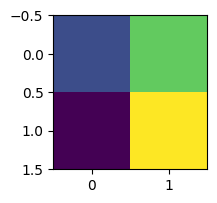

In [ ]:
'''# Calculate accuracy
accuracy_train = np.mean(predictions_train == y_train)
accuracy_test = np.mean(predictions_test == y_test)

print(f'Training Accuracy: {accuracy_train * 100:.2f}%')
print(f'Testing Accuracy: {accuracy_test * 100:.2f}%')'''

gmm_metric=Metric(predictions_test,y_test)
gmm_metric.accuracy()
gmm_metric.confusion_matrix()
gmm_metric.f1_score()

**Using Parzen Window**

In [ ]:
class ParzenWindowClassifier:
    def __init__(self, h, kernel='gaussian', V=None):
        self.h = h
        self.kernel = kernel
        self.V = V  # Fixed volume V

    def gaussian_kernel(self, x):
        return np.exp(-(x ** 2) / 2) / np.sqrt(2 * np.pi)

    def epanechnikov_kernel(self, x):
        return 0.75 * (1 - x ** 2) if np.abs(x) <= 1 else 0

    def estimate_density(self, data, x):
        kernel_func = self.gaussian_kernel if self.kernel == 'gaussian' else self.epanechnikov_kernel
        distances = np.abs(x - data) / self.h

        if self.V is not None:
            # Keep only the points within the fixed volume V
            distances = distances[distances <= self.V]

        return np.sum(kernel_func(distances)) / (len(data) * self.h)

    def fit(self, X, y):
        self.classes = np.unique(y)
        self.class_densities = {}

        for c in self.classes:
            class_data = X[y == c]
            self.class_densities[c] = class_data

    def predict(self, X):
        predictions = []
        for x in X:
            posterior_probs = []

            for c in self.classes:
                density_estimate = np.mean([self.estimate_density(class_data, x) for class_data in self.class_densities[c]])
                posterior_probs.append(density_estimate)

            predicted_class = np.argmax(posterior_probs)
            predictions.append(predicted_class)

        return np.array(predictions)

# Choose bandwidth h, kernel type, and V (fixed volume)
h_value = 0.5
kernel_type = 'gaussian'  # or 'epanechnikov'
V_value = 0.2  # Fixed volume V

# Initialize and fit Parzen window classifier
parzen_classifier = ParzenWindowClassifier(h=h_value, kernel=kernel_type, V=V_value)
parzen_classifier.fit(X_train, y_train)

# Make predictions on the test data
predictions = parzen_classifier.predict(X_test[:500])

'''# Evaluate accuracy
accuracy = np.mean(predictions == y_test)
print(f"Classification Accuracy: {accuracy}")'''

'# Evaluate accuracy\naccuracy = np.mean(predictions == y_test)\nprint(f"Classification Accuracy: {accuracy}")'

Accuracy of 72.6%
Confusion Matrix: 
[[217  35]
 [102 146]]
F1 Score: 0.68


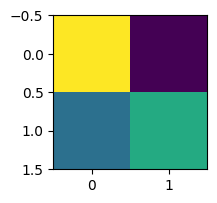

In [ ]:
perzen_metric=Metric(predictions,y_test)
perzen_metric.accuracy()
perzen_metric.confusion_matrix()
perzen_metric.f1_score()

**Using KNN**

In [ ]:
class KNNClassifier:
    def __init__(self, k, distance_metric='euclidean'):
        self.k = k
        self.distance_metric = distance_metric

    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def cosine_distance(self, x1, x2):
        dot_product = np.dot(x1, x2)
        norm_x1 = np.linalg.norm(x1)
        norm_x2 = np.linalg.norm(x2)
        return 1 - (dot_product / (norm_x1 * norm_x2))

    def calculate_distance(self, x1, x2):
        if self.distance_metric == 'euclidean':
            return self.euclidean_distance(x1, x2)
        elif self.distance_metric == 'cosine':
            return self.cosine_distance(x1, x2)

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = []
        for x in X:
            distances = [self.calculate_distance(x, x_train) for x_train in self.X_train]
            sorted_indices = np.argsort(distances)[:self.k]
            k_nearest_labels = self.y_train[sorted_indices]
            predicted_class = np.argmax(np.bincount(k_nearest_labels))
            predictions.append(predicted_class)

        return np.array(predictions)



Accuracy of 72.0%
Confusion Matrix: 
[[45  8]
 [20 27]]
F1 Score: 0.66
Accuracy of 74.0%
Confusion Matrix: 
[[47  6]
 [20 27]]
F1 Score: 0.68
Accuracy of 77.0%
Confusion Matrix: 
[[44  9]
 [14 33]]
F1 Score: 0.74
Accuracy of 76.0%
Confusion Matrix: 
[[45  8]
 [16 31]]
F1 Score: 0.72


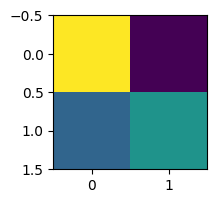

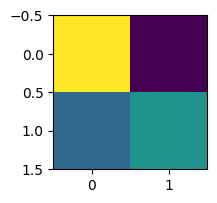

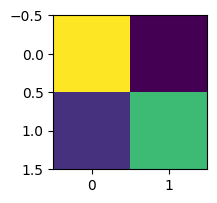

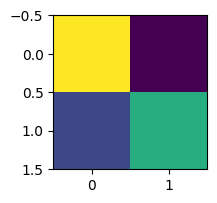

In [ ]:
# Choose K-values and distance metric
k_values = [10, 15]  # Try different K-values
distance_metrics = ['euclidean', 'cosine']

for k_value in k_values:
    for distance_metric in distance_metrics:
        # Initialize and fit KNN classifier
        knn_classifier = KNNClassifier(k=k_value, distance_metric=distance_metric)
        knn_classifier.fit(X_train, y_train)

        # Make predictions on the test data
        predictions = knn_classifier.predict(X_test[:100])
        knn_metric=Metric(predictions,y_test)

        '''# Evaluate accuracy
        accuracy = np.mean(predictions == y_test)'''
        knn_metric.accuracy()
        knn_metric.confusion_matrix()
        knn_metric.f1_score()

**Using OVR**

In [ ]:
class LinearClassifierOvR:
    def __init__(self):
        self.classifiers = {}

    def fit(self, X, y):
        unique_classes = np.unique(y)
        for c in unique_classes:
            binary_labels = (y == c).astype(int)
            classifier = self.train_binary_classifier(X, binary_labels)
            self.classifiers[c] = classifier

    def train_binary_classifier(self, X, binary_labels):
        # Adding a bias term to X
        X_bias = np.column_stack((np.ones(X.shape[0]), X))

        # Using numpy's linear regression
        weights = np.linalg.lstsq(X_bias, binary_labels, rcond=None)[0]

        return weights

    def predict(self, X):
        predictions = []
        for c, classifier in self.classifiers.items():
            # Adding a bias term to X
            X_bias = np.column_stack((np.ones(X.shape[0]), X))

            # Predicting using the binary classifier
            binary_predictions = np.dot(X_bias, classifier)

            # Each class gets a score
            predictions.append(binary_predictions)

        # The class with the highest score is the predicted class
        return np.argmax(np.array(predictions), axis=0)



Accuracy of 66.286%
Confusion Matrix: 
[[951 447]
 [497 905]]
F1 Score: 0.66


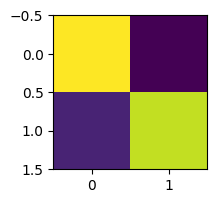

In [ ]:
# Initialize and fit Linear OvR classifier
linear_classifier = LinearClassifierOvR()
linear_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = linear_classifier.predict(X_test)
ovr_metric=Metric(y_pred,y_test)
ovr_metric.accuracy()
ovr_metric.confusion_matrix()
ovr_metric.f1_score()


**QUESTION_5**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

file_path = '/content/drive/MyDrive/Second Sem_IISc/PRNN/Assignment1/multi_class_classification_data_group_12_train (1).txt'
data = np.loadtxt(file_path,delimiter='\t',dtype=str)
data[1:5]
data.shape

(70001, 26)

In [ ]:
# Extracting features and labels
X = data[1:, :-1].astype(float)  # Features excluding the header
y = data[1:, -1].astype(int)     # Labels excluding the header

# Print some information
print("First few rows of X (features):\n", X[0:5])
print("First few elements of y (labels):\n", y[0:5])
unique_classes = np.unique(y)
print("Unique Classes:", unique_classes)

First few rows of X (features):
 [[ 0.03567072 -0.13605927  1.39728663  0.19125106  0.41921568 -0.41196057
  -1.22386503  0.78616478  0.89758178  0.08227311  0.36970005  0.79879883
   0.6310236   1.58111522  0.78166139  0.06372593  0.23313199 -0.43068592
   0.27866696  0.64903222 -0.32400768  1.58006043  0.21234847  0.48872898
   0.9708993 ]
 [-0.8537124   0.19005893  0.29470349  0.70944975 -0.51546422  0.21943385
   0.78027966  1.51104997  0.82259257  0.75879055  0.5376672   0.60952926
   0.41875756  0.16688143  0.25539793 -0.68301581  0.86925486  0.03962271
   0.78552572 -0.48462371  0.09399862  1.13001014  1.08206707  2.16054787
   0.64127753]
 [ 0.68055442  1.09221226  0.99158973  1.48418078  0.1200416   0.67491922
   0.96895122  0.45272134 -0.39468462 -0.0333729   0.94870357  0.22720739
  -0.28136973  3.09157464  1.34105779  0.62615502  1.09094656  0.98241389
   0.11566371  0.79774785  0.3754482   0.8882071   0.19354931  0.65920569
   0.46162437]
 [-0.56454716  1.00458402  0.60881

In [ ]:
# Split the data into training and testing sets
split_idx = int(0.7* len(y))
X_train, X_test = X[:split_idx, :], X[split_idx:, :]
y_train, y_test = y[:split_idx], y[split_idx:]

**USING NORMAL**

In [ ]:
class MeanVarCovAnalyzer:
    def __init__(self, data):
        self.data = np.array(data)

    def calculate_mean(self):
        mean_vector = np.mean(self.data, axis=0, keepdims=True)
        return mean_vector

    def calculate_variance(self):
        variance_vector = np.var(self.data, axis=0, keepdims=True)
        return variance_vector

    def calculate_covariance_matrix(self):
        variance_vector = self.calculate_variance()
        covariance_matrix = np.diag(variance_vector[0])
        return covariance_matrix

In [ ]:
class MulticlassClassifier_Normaldensity:
    def __init__(self, X, y):
        self.X = np.array(X)
        self.y = np.array(y)
        self.num_classes = 10
        self.prior = self.calculate_prior()
        self.class_covariance_matrices = self.calculate_class_covariance_matrices()

    def calculate_prior(self):
        prior_list = [np.sum(self.y == i) / len(self.y) for i in range(self.num_classes)]
        return prior_list

    def calculate_class_covariance_matrices(self):
        class_covariance_matrices = []
        for class_num in range(self.num_classes):
            class_data = self.X[self.y == class_num]
            analyzer = MeanVarCovAnalyzer(class_data)
            class_covariance_matrix = analyzer.calculate_covariance_matrix()
            class_covariance_matrices.append(class_covariance_matrix)
        return class_covariance_matrices

    def calculate_class_conditional_density(self, class_num, x):
        mean_vector = np.mean(self.X[self.y == class_num], axis=0)
        class_covariance_matrix = self.class_covariance_matrices[class_num]
        inv_covariance_matrix = np.linalg.inv(class_covariance_matrix)
        det_covariance_matrix = np.linalg.det(class_covariance_matrix)
        exponent = -0.5 * np.dot(np.dot((x - mean_vector), inv_covariance_matrix), (x - mean_vector).T)
        density = (1 / ((2 * np.pi) ** (self.X.shape[1] / 2) * np.sqrt(det_covariance_matrix))) * np.exp(exponent)
        return density

    def calculate_posterior(self, x):
        posterior_list = []
        for class_num in range(self.num_classes):
            class_conditional = self.calculate_class_conditional_density(class_num, x)
            posterior_prob = class_conditional * self.prior[class_num]
            posterior_list.append(posterior_prob)
        return posterior_list

    def predict(self, X_pred):
        y_pred = []
        for x in X_pred:
            posterior_probs = self.calculate_posterior(x)
            predicted_class = np.argmax(posterior_probs)
            y_pred.append(predicted_class)
        return y_pred

In [ ]:
multiclass_classifier = MulticlassClassifier_Normaldensity(X_train, y_train)
y_pred = multiclass_classifier.predict(X_test)
multi_normal_metric=Metric(y_pred,y_test)
multi_normal_metric.accuracy()
val=multi_normal_metric.multi_class_confusion_matrix()
multi_normal_metric.multi_class_f1_Score(val)

**USING GMM**

In [ ]:
class GMM:
    def __init__(self, n_components=5, max_iter=10):
        self.n_components = n_components
        self.max_iter = max_iter
        self.pi = [1.0 / (self.n_components) for _ in range(self.n_components)]

    def multivariate_normal(self, x, mean_vector, covariance_matrix):
        """Calculates the probability density function."""
        const_part = (2 * np.pi) ** (-len(x) / 2.0) * np.linalg.det(covariance_matrix) ** (-1 / 2)
        expo_part = np.exp(-np.dot(np.dot((x - mean_vector).T, np.linalg.inv(covariance_matrix)), (x - mean_vector)) / 2)
        return const_part * expo_part

    def fit(self, X):
        """Trains the GMM model on the given data X using the EM algorithm."""
        self.mean_vector = np.random.rand(self.n_components, X.shape[1])
        self.covariance_matrices = [np.eye(X.shape[1]) for _ in range(self.n_components)]

        for iteration in range(self.max_iter):
            # E-step: Calculate responsibility matrix (consider using logsumexp for numerical stability)
            RespMatrix = np.zeros((len(X), self.n_components))
            for i in range(len(X)):
                log_probs = []
                for k in range(self.n_components):
                    log_probs.append(np.log(self.pi[k]) + self.multivariate_normal(X[i], self.mean_vector[k], self.covariance_matrices[k]))
                RespMatrix[i, :] = np.exp(log_probs - np.max(log_probs))

            # M-step: Update parameters
            N = np.sum(RespMatrix, axis=0)

            self.mean_vector = np.dot(RespMatrix.T, X) / N[:, np.newaxis]

            self.covariance_matrices = [
                np.dot(RespMatrix[:, k] * (X - self.mean_vector[k]).T, X - self.mean_vector[k]) / N[k]
                for k in range(self.n_components)
            ]

            self.pi = N / len(X)

    def predict(self, X):
        """Predicts the component assignments for new data points X."""
        probas = []
        for n in range(len(X)):
            probas.append([self.multivariate_normal(X[n], self.mean_vector[k], self.covariance_matrices[k])
                           for k in range(self.n_components)])
        cluster = [np.argmax(proba) for proba in probas]
        return cluster



In [ ]:
gmm_model=GMM()
gmm_model.fit(X_train)
y_pred=gmm_model.predict(X_test)
accuracy = (np.sum(y_pred == y_test) / len(y_test))*100
print("Accuracy on the test set:", accuracy)

**PERZEN WINDOW**

In [ ]:
class ParzenWindowClassifier:
    def __init__(self, h, kernel=None, V=None):
        self.h = h
        self.kernel = kernel or ['Gaussian']
        self.V = V  # Fixed volume V

    def gaussian_kernel(self, x):
        return np.exp(-(x ** 2) / 2) / np.sqrt(2 * np.pi)


    def epanechnikov_kernel(self, x):
        return 0.75 * (1 - x**2) * (np.abs(x) <= 1)


    def estimate_density(self, data, x):
        kernel_func = self.gaussian_kernel if self.kernel == 'gaussian' else self.epanechnikov_kernel
        distances = np.abs(x - data) / self.h

        if self.V is not None:
            # Keep only the points within the fixed volume V
            distances = distances[distances <= self.V]

        return np.sum(kernel_func(distances)) / (len(data) * self.h)

    def fit(self, X, y):
        self.classes = np.unique(y)
        self.class_densities = {}

        for c in self.classes:
            class_data = X[y == c]
            self.class_densities[c] = class_data

    def predict(self, X):
        predictions = []
        for x in X:
            posterior_probs = []

            for c in self.classes:
                density_estimate = np.mean([self.estimate_density(class_data, x) for class_data in self.class_densities[c]])
                posterior_probs.append(density_estimate)

            predicted_class = np.argmax(posterior_probs)
            predictions.append(predicted_class)

        return np.array(predictions)

In [ ]:
h_value = 0.3
kernel_types = ['gaussian', 'epanechnikov']

for kernel_type in kernel_types:
    parzen_classifier = ParzenWindowClassifier(h=h_value, kernel=[kernel_type])
    parzen_classifier.fit(X_train, y_train)

    predictions = parzen_classifier.predict(X_test)

    accuracy = np.mean(predictions == y_test)
    print(f"Classification Accuracy for {kernel_type.capitalize()} Kernel: {accuracy}")

    # Plot the decision boundaries
    plt.scatter(X_test[:, 0], X_test[:, 1], c=predictions, cmap='viridis', edgecolors='k', alpha=0.6)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'Parzen Window Classifier Decision Boundaries ({kernel_type.capitalize()} Kernel)')
    plt.show()

**USING KNN**

In [ ]:
class KNNClassifier:
    def __init__(self, k, distance_metric='euclidean'):
        self.k = k
        self.distance_metric = distance_metric

    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def cosine_distance(self, x1, x2):
        dot_product = np.dot(x1, x2)
        norm_x1 = np.linalg.norm(x1)
        norm_x2 = np.linalg.norm(x2)
        return 1 - (dot_product / (norm_x1 * norm_x2))

    def calculate_distance(self, x1, x2):
        if self.distance_metric == 'euclidean':
            return self.euclidean_distance(x1, x2)
        elif self.distance_metric == 'cosine':
            return self.cosine_distance(x1, x2)

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = []
        for x in X:
            distances = [self.calculate_distance(x, x_train) for x_train in self.X_train]
            sorted_indices = np.argsort(distances)[:self.k]
            k_nearest_labels = self.y_train[sorted_indices]
            predicted_class = np.argmax(np.bincount(k_nearest_labels))
            predictions.append(predicted_class)

        return np.array(predictions)

In [ ]:
# Choose K-values and distance metric
k_values = [10, 15, 20]  # Try different K-values
distance_metrics = ['euclidean', 'cosine']

# Iterate over K-values and distance metrics
for k_value in k_values:
    for distance_metric in distance_metrics:
        # Initialize and fit KNN classifier
        knn_classifier = KNNClassifier(k=k_value, distance_metric=distance_metric)
        knn_classifier.fit(X_train, y_train)

        # Make predictions on the test data
        predictions = knn_classifier.predict(X_test[:3000])

        # Evaluate accuracy
        accuracy = np.mean(predictions == y_test)
        print(f"K={k_value}, Distance Metric={distance_metric}, Classification Accuracy: {accuracy}")

**USING OVR**

In [ ]:
class LinearClassifierOvR:
    def __init__(self):
        self.classifiers = {}

    def fit(self, X, y):
        unique_classes = np.unique(y)
        for c in unique_classes:
            binary_labels = (y == c).astype(int)
            classifier = self.train_binary_classifier(X, binary_labels)
            self.classifiers[c] = classifier

    def train_binary_classifier(self, X, binary_labels):
        # Adding a bias term to X
        X_bias = np.column_stack((np.ones(X.shape[0]), X))

        # Using numpy's linear regression
        weights = np.linalg.lstsq(X_bias, binary_labels, rcond=None)[0]

        return weights

    def predict(self, X):
        predictions = []
        for c, classifier in self.classifiers.items():
            # Adding a bias term to X
            X_bias = np.column_stack((np.ones(X.shape[0]), X))

            # Predicting using the binary classifier
            binary_predictions = np.dot(X_bias, classifier)

            # Each class gets a score
            predictions.append(binary_predictions)

        # The class with the highest score is the predicted class
        return np.argmax(np.array(predictions), axis=0)

In [ ]:
# Initialize and fit Linear OvR classifier
linear_classifier = LinearClassifierOvR()
linear_classifier.fit(X_train, y_train)

# Make predictions on the test data
predictions = linear_classifier.predict(X_test)

# Evaluate accuracy
accuracy = np.mean(predictions == y_test)
print(f"Linear OvR Classification Accuracy: {accuracy}")